In [2]:
!pip install seaborn
# diabetes_pipeline_simple_usercode.py
# Your original pipeline, kept minimal and easy-to-remember.
# Put your Kaggle CSV path below (or a local CSV with the same columns).
CSV_PATH = "diabetes.csv"

# ---------------------------
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC



                                              0.0/294.9 kB ? eta -:--:--
     -------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# ---------------------------
# Load data
df = pd.read_csv(CSV_PATH)
print("✅ Dataset Loaded Successfully")
print(df.head())



✅ Dataset Loaded Successfully
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# --- Step 3: Data Cleaning ---
# Replace zero values with NaN for certain columns and fill with mean
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_fix:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].mean(), inplace=True)

print("\n✅ Missing Values Handled Successfully")
print(df.isnull().sum())




✅ Missing Values Handled Successfully
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\saipr\AppData\Local\Temp\ipykernel_28732\3596159781.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [6]:
# --- Step 4: Define Features and Target ---
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']



In [7]:
# --- Step 5: Feature Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [8]:
# --- Step 6: Split Data into Train and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [9]:
# --- Step 7: Logistic Regression Model ---
lr = LogisticRegression(random_state=42, max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)



In [10]:
# --- Step 8: Random Forest Model ---
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)



In [11]:
# --- Step 9: Evaluate Models ---
print("\n--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\n--- Random Forest Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))




--- Logistic Regression Results ---
Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154


--- Random Forest Results ---
Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [12]:
# --- Step 10: Risk Factor (Feature Importance) Analysis ---
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Risk Factor Importance (Random Forest) ---")
print(feature_importance)




--- Risk Factor Importance (Random Forest) ---
                    Feature  Importance
1                   Glucose    0.257437
5                       BMI    0.166827
7                       Age    0.131211
6  DiabetesPedigreeFunction    0.118966
4                   Insulin    0.093984
2             BloodPressure    0.084190
3             SkinThickness    0.073973
0               Pregnancies    0.073412


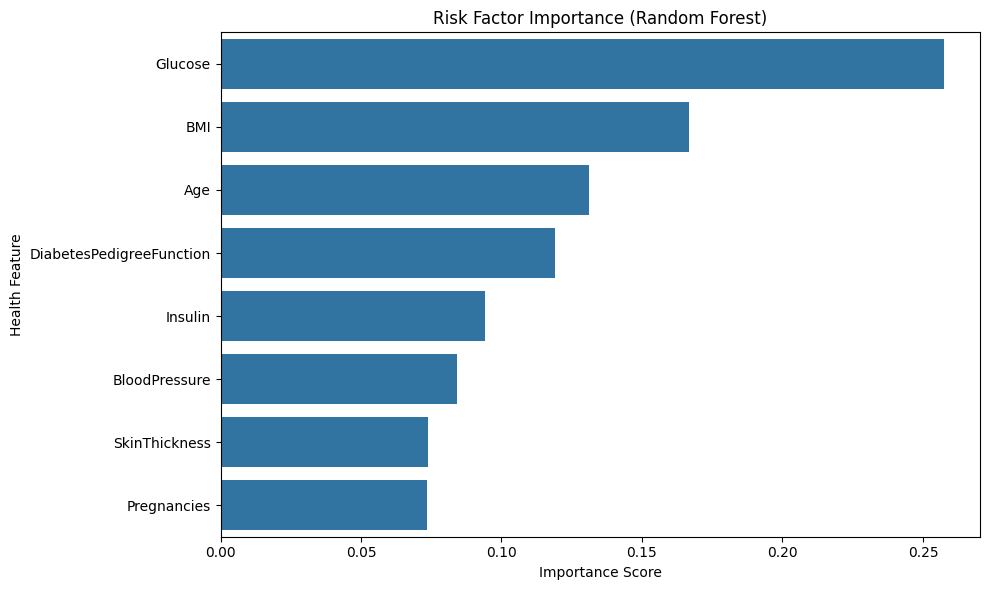

In [13]:
# --- Step 11: Visualization of Risk Factors ---
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Risk Factor Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Health Feature')
plt.tight_layout()
plt.show()



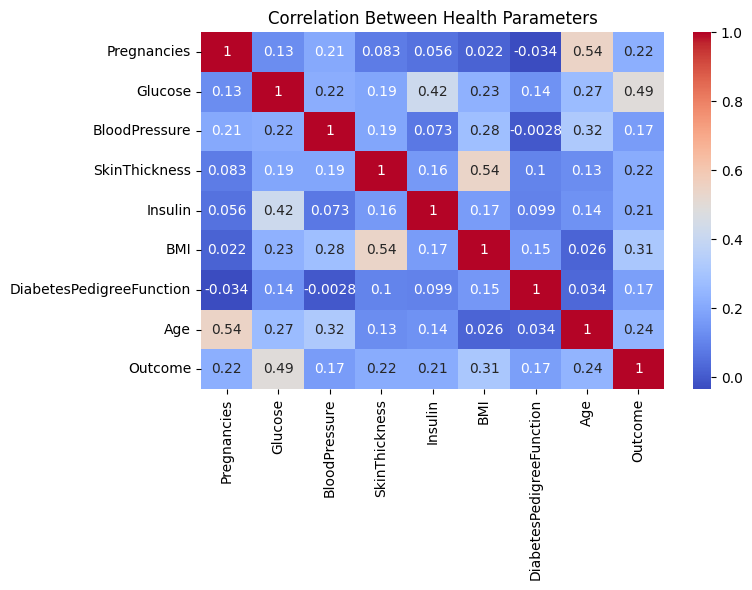

In [14]:
# --- Step 12: Correlation Heatmap (Additional Insight) ---
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Health Parameters")
plt.tight_layout()
plt.show()



In [15]:
# ---------------------------
# Optional: Decision Tree & SVM (kept from your later code block)
# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n--- Decision Tree Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))




--- Decision Tree Results ---
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        99
           1       0.57      0.80      0.67        55

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.76      0.71      0.72       154



In [16]:
# SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\n--- SVM Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))




--- SVM Results ---
Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



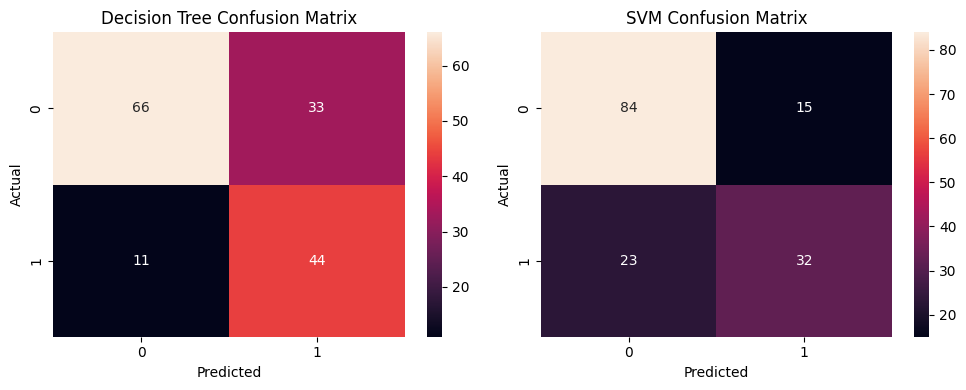

In [17]:
# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted"); axes[0].set_ylabel("Actual")
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Predicted"); axes[1].set_ylabel("Actual")
plt.tight_layout()
plt.show()



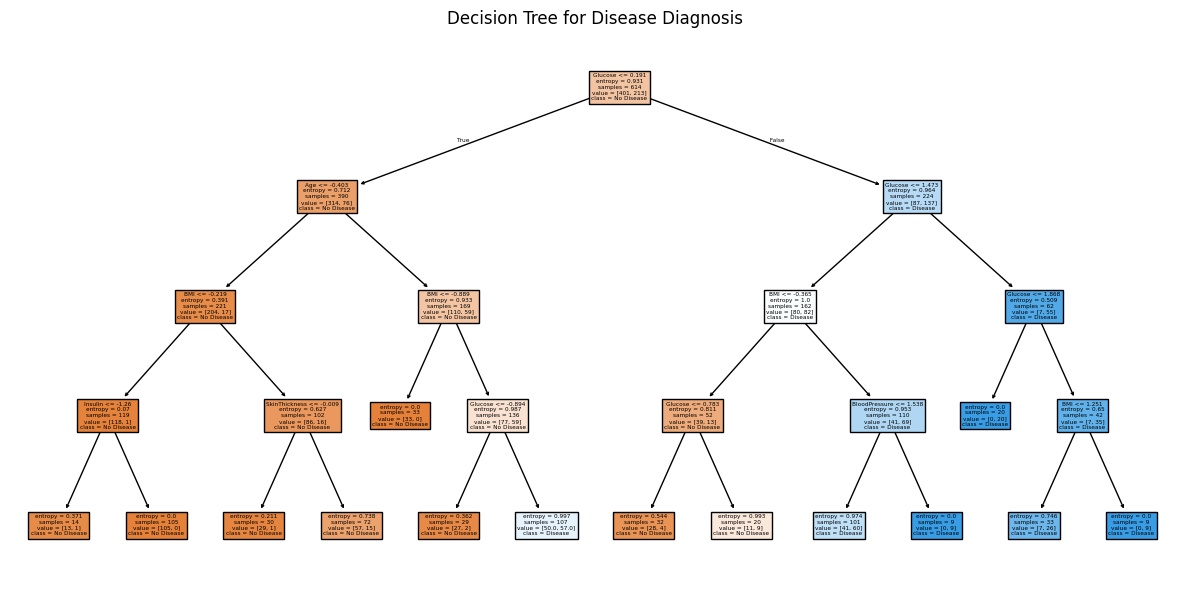

In [18]:
# Visualize Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree for Disease Diagnosis")
plt.tight_layout()
plt.show()



In [19]:
# Example prediction on new patient (kept your example)
# Example patient values must match column order in X (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age)
new_patient = np.array([[2, 150, 80, 25, 100, 30.5, 0.45, 35]])
new_patient_scaled = scaler.transform(new_patient)
prediction = svm.predict(new_patient_scaled)
print("\nNew Patient Prediction (SVM):", "Disease" if prediction[0] == 1 else "No Disease")



New Patient Prediction (SVM): Disease


C:\Users\saipr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:


# 1️⃣ Descriptive Statistics
print(df.describe())     # mean, median, std, etc.



       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

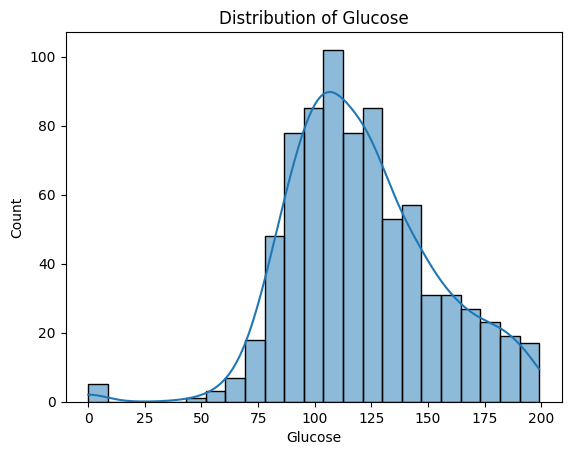

In [24]:
# 2️⃣ Histogram (Univariate)
sns.histplot(df['Glucose'], kde=True)
plt.title('Distribution of Glucose')
plt.show()



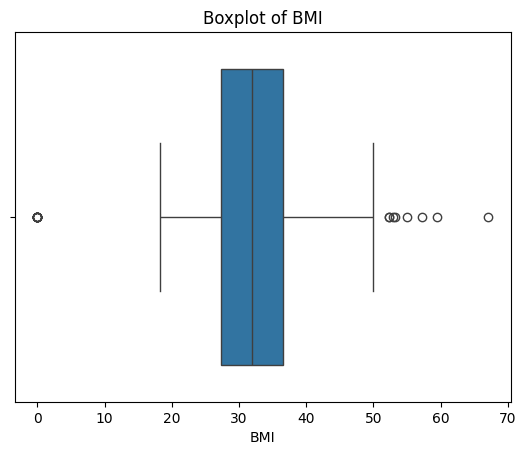

In [25]:
# 3️⃣ Boxplot (Outlier Detection)
sns.boxplot(x=df['BMI'])
plt.title('Boxplot of BMI')
plt.show()



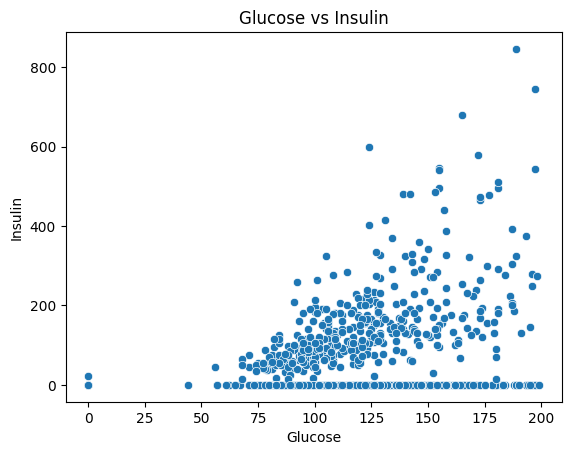

In [26]:
# 4️⃣ Scatter Plot (Bivariate)
sns.scatterplot(x='Glucose', y='Insulin', data=df)
plt.title('Glucose vs Insulin')
plt.show()

